# Digit Recognizer
## DataSet Kaggle para reconhecimento de digitos de 0 a 9 manuscritos.
## Link para o DataSet: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer 
### Para esse exemplo gostaria de usar uma Rede Neural para reconhecer as imagens.

#### Importação das bibliotecas
##### O numpy para usar as propriedades matematicas
##### O pandas para importação dos dados
##### O tensor flow e keras para a montagem da rede neural
##### O matplotlib para Vizualização dos dados

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#importando layer convulacional
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt


In [7]:
#Importação dos dados
dataset = pd.read_csv('train.csv')
X, y = dataset.iloc[:, 1:].values, dataset.iloc[:, 0].values
print(X.shape, y.shape)

(42000, 784) (42000,)


##### Conhecendo melhor os dados

In [9]:
print("Primeiro elemento de X: \n", X[0])

Primeiro elemento de X: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 

In [10]:
print("Primeiro elemento de y: \n", y[0])
print("Ultimo elemento de y: \n", y[-1])

Primeiro elemento de y: 
 1
Ultimo elemento de y: 
 9


In [13]:
print("As dimensoes de X é: "+ str(X.shape))
print("As dimensoes de Y é: "+ str(y.shape))

As dimensoes de X é: (42000, 784)
As dimensoes de Y é: (42000,)


##### Vizualização dos dados

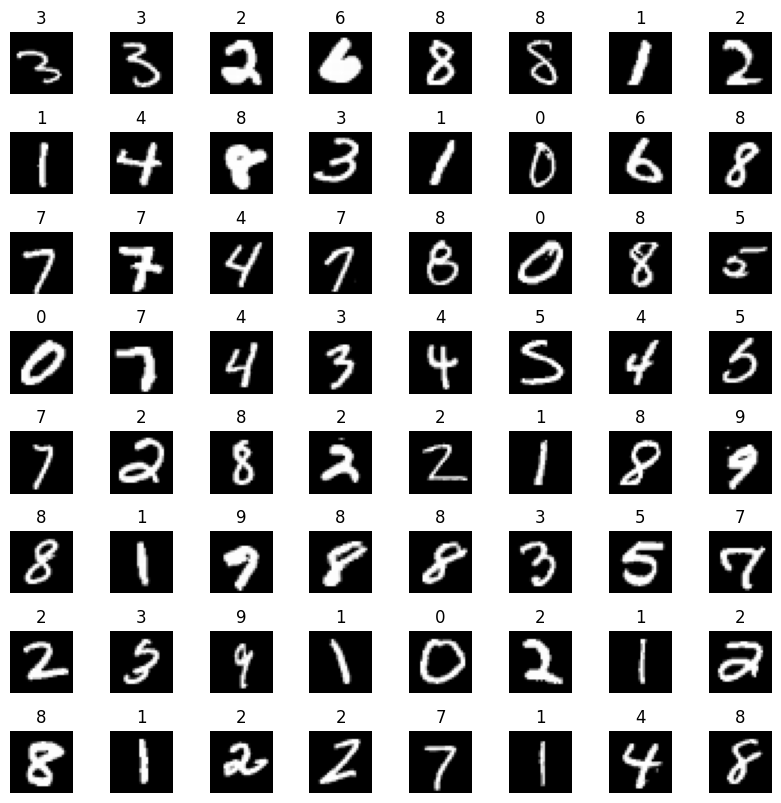

In [23]:
m , n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    #Selecionando uma imagem aleatoria
    random_index = np.random.randint(m)
    # pegando a imagem no indice aleatorio e redimensionando ela para 28x28
    X_random_reshape = X[random_index].reshape(28,28)
    # Plotando a imagem
    ax.imshow(X_random_reshape, cmap='gray')
    # Plotando a label da imagem(resultado certo)
    ax.set_title(y[random_index])
    # Tirando as linhas do grafico
    ax.set_axis_off()


##### Vamos criar o nosso modelo de Rede Neural
##### Como as nossas imagens são representadas por um conjunto de inteiros de tamanho 784 que representam a intensidade do pixel, vamos definir um padrão de entrada para a rede neural de 784.
##### Para as camadas ocultas vou usar uma camada com 32 neurônios e uma com 64 neurônios e ambas com a função de ativação relu, pois é a que se adapta a maioria dos casos. 
##### Para a camada de saída vou utilizar 10 neurônios, 1 para cada resultado possivel(0-9) com a função de ativação softmax, que é a regressão logistica só que para multiclasses(mais de 2 classes possíveis).

In [60]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(32,activation="relu"),
        Dense(64,activation="relu"),
        Dense(10, activation="softmax")
    ], name = "Rede Neural" 
)

In [61]:
model.summary()

Model: "Rede Neural"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                25120     
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [59]:
model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.9197 - val_loss: 0.3788 - val_accuracy: 0.9067
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2862 - accuracy: 0.9225 - val_loss: 0.3500 - val_accuracy: 0.9069
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2676 - accuracy: 0.9290 - val_loss: 0.4021 - val_accuracy: 0.9136
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2557 - accuracy: 0.9306 - val_loss: 0.3211 - val_accuracy: 0.9195
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2458 - accuracy: 0.9319 - val_loss: 0.2979 - val_accuracy: 0.9276
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2228 - accuracy: 0.9363 - val_loss: 0.2893 - val_accuracy: 0.9270
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2221 - accuracy: 0.9372 - val_loss: 0.3041 - val_ac

### Assim obtendo um modelo de rede neural treinado e com acurácia de 97.99%, uma melhori para o modelo poderia ser usando camadas convolucionais para aprimorar a acuácia.